## My Exploration in Nashville Rock n Roll Marathons 2016-2019

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

%matplotlib inline

## Read in the scraped Marathon csv files

In [2]:
full_2019 = pd.read_csv('../data/full_2019.csv', index_col=0)
full_2018 = pd.read_csv('../data/full_2018.csv', index_col=0)
full_2017 = pd.read_csv('../data/full_2017.csv', index_col=0)
full_2016 = pd.read_csv('../data/full_2016.csv', index_col=0)

half_2019 = pd.read_csv('../data/half_2019.csv', index_col=0)
half_2018 = pd.read_csv('../data/half_2018.csv', index_col=0)
half_2017 = pd.read_csv('../data/half_2017.csv', index_col=0)
half_2016 = pd.read_csv('../data/half_2016.csv', index_col=0)

In [3]:
full_2019.head()

,Overall,Bib,Name,Time
0,1,30001,Travis Peruski,01:37:54
1,2,1,Scott Wietecha,02:34:59
2,3,4,Jordan Wilson,02:35:24
3,4,30034,Steelton Flynn,02:39:59
4,5,30035,Thomas Ellis,02:42:09


## Subset Half Marathon Finishers Only

In [4]:
half_2019_finishers = pd.read_csv('../data/half_2019.csv', nrows= 13706, index_col=0)

In [5]:
half_2017_finishers = pd.read_csv('../data/half_2017.csv', nrows = 17699, index_col=0)

In [6]:
half_2016_finishers = pd.read_csv('../data/half_2016.csv', nrows = 17917, index_col=0)

## Add year column to all full Marathons

In [7]:
full_2019['Year'] = 2019
full_2018['Year'] = 2018
full_2017['Year'] = 2017
full_2016['Year'] = 2016

## Add year column to all Half Marathons

In [8]:
half_2019_finishers['Year'] = 2019
half_2018['Year'] = 2018
half_2017_finishers['Year'] = 2017
half_2016_finishers['Year'] = 2016

In [9]:
half_2019_finishers.head()

,Bib,Name,Time,Year
Overall,,,,
1,31,Nick French,01:10:03,2019
2,33,Ian Bordelon,01:12:15,2019
3,32,Chris Demetra,01:12:52,2019
4,1025,Grayson Reid,01:15:10,2019
5,34,Jason Vincze,01:17:01,2019


## Subset Full Marathon Finishers Only

In [10]:
full_2019_finishers = full_2019.loc[full_2019['Time'] > '00:00:00']

In [11]:
full_2018_finishers = full_2018.loc[full_2018['Time'] > '00:00:00']

In [12]:
full_2017_finishers = full_2017.loc[full_2017['Time'] > '00:00:00']

In [13]:
full_2016_finishers = full_2016.loc[full_2016['Time'] > '00:00:00']

In [14]:
full_2016_finishers.shape

(2978, 5)

In [15]:
full_2019_finishers.head()

,Overall,Bib,Name,Time,Year
0,1,30001,Travis Peruski,01:37:54,2019
1,2,1,Scott Wietecha,02:34:59,2019
2,3,4,Jordan Wilson,02:35:24,2019
3,4,30034,Steelton Flynn,02:39:59,2019
4,5,30035,Thomas Ellis,02:42:09,2019


## Travis Peruski is a disabled athlete and was misentered into these results, requiring the row to be dropped for accurate analysis.

In [16]:
full_2019_mod = full_2019_finishers.drop([full_2019_finishers.index[0]])

In [17]:
full_2019_mod.head()

,Overall,Bib,Name,Time,Year
1,2,1,Scott Wietecha,02:34:59,2019
2,3,4,Jordan Wilson,02:35:24,2019
3,4,30034,Steelton Flynn,02:39:59,2019
4,5,30035,Thomas Ellis,02:42:09,2019
5,6,33172,Nicholas Tseffos,02:48:42,2019


In [18]:
full_2019_mod.tail()

,Overall,Bib,Name,Time,Year
20,2021,32032,Casey Thomaston,06:29:57,2019
21,2022,33147,Deanna Alexander,06:30:17,2019
22,2023,32980,Daniel Albert,06:35:52,2019
23,2024,30113,Jacqueline Spires,06:36:58,2019
24,2025,30026,Alex Easley,06:43:55,2019


## Reset index of full_2019_mod

In [19]:
full_2019_mod = full_2019_mod.reset_index(drop = True)

## Concat all Full Marathons

In [20]:
##vertical_stack = pd.concat([survey_sub, survey_sub_last10], axis=0)

all_full_marathons = pd.concat([full_2019_mod, full_2018_finishers, full_2017_finishers, full_2016_finishers], axis=0)

In [21]:
all_full_marathons.shape

(9624, 5)

In [22]:
all_full_marathons = all_full_marathons.reset_index()

In [23]:
all_full_marathons.head()

,index,Overall,Bib,Name,Time,Year
0,0,2,1,Scott Wietecha,02:34:59,2019
1,1,3,4,Jordan Wilson,02:35:24,2019
2,2,4,30034,Steelton Flynn,02:39:59,2019
3,3,5,30035,Thomas Ellis,02:42:09,2019
4,4,6,33172,Nicholas Tseffos,02:48:42,2019


In [24]:
all_full_marathons.tail()

,index,Overall,Bib,Name,Time,Year
9619,18,99999,26003,Alyson Cook,06:27:05,2016
9620,20,99999,3064,Susan Louis,02:49:02,2016
9621,6,99999,20104,William Hanson,03:30:01,2016
9622,10,99999,8099,Phillip Hickman,03:38:53,2016
9623,16,99999,27141,Jessica Scott,06:49:41,2016


## Concat all Half Marathons

In [25]:
all_half_marathons = pd.concat([half_2019_finishers, half_2018, half_2017_finishers, half_2016_finishers], axis=0)

In [26]:
all_half_marathons.shape

(64262, 4)

In [27]:
all_half_marathons = all_half_marathons.reset_index()

In [28]:
all_half_marathons.head()

,Overall,Bib,Name,Time,Year
0,1,31,Nick French,01:10:03,2019
1,2,33,Ian Bordelon,01:12:15,2019
2,3,32,Chris Demetra,01:12:52,2019
3,4,1025,Grayson Reid,01:15:10,2019
4,5,34,Jason Vincze,01:17:01,2019


In [29]:
all_half_marathons.tail()

,Overall,Bib,Name,Time,Year
64257,18147,39121,Jana Spicer,04:52:14,2016
64258,18148,39324,Susan Vacek,04:54:38,2016
64259,18149,28712,Carly Morton,04:54:39,2016
64260,18150,22378,Becki Baumgartner,04:54:39,2016
64261,18151,21599,Christine Bamberger,04:54:41,2016


## Convert finish time to pd.datetime...or as another datatype?

In [58]:
all_half_marathons['Time'] = pd.to_timedelta(all_half_marathons['Time']) ## try without errors arg

In [59]:
all_full_marathons['Time'] = pd.to_timedelta(all_full_marathons['Time'])

## Dataframe info...

In [32]:
all_half_marathons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64262 entries, 0 to 64261
Data columns (total 5 columns):
Overall    64262 non-null int64
Bib        64262 non-null int64
Name       64262 non-null object
Time       64262 non-null timedelta64[ns]
Year       64262 non-null int64
dtypes: int64(3), object(1), timedelta64[ns](1)
memory usage: 2.5+ MB


## Calculate stats of all half marathons

In [33]:
all_half_marathons['Time'].describe()

count                     64262
mean     0 days 02:35:17.950063
std      0 days 00:34:51.697240
min             0 days 01:09:25
25%             0 days 02:10:04
50%             0 days 02:29:39
75%             0 days 02:55:19
max             0 days 06:26:37
Name: Time, dtype: object

## Max and Min Time

In [34]:
print(all_half_marathons.Time.min())

0 days 01:09:25


In [35]:
print(all_half_marathons.Time.max())

0 days 06:26:37


In [36]:
print(all_full_marathons.Time.min())

0 days 01:26:11


In [37]:
print(all_full_marathons.Time.max())

0 days 07:00:00


## Convert 'Time' to int 64...

In [38]:
all_half_marathons['Time'] = all_half_marathons['Time'].values.astype(np.int64)
all_full_marathons['Time'] = all_full_marathons['Time'].values.astype(np.int64)


## ...and back to datetime

In [39]:
means_half = all_half_marathons.groupby(['Year']).Time.mean().astype('timedelta64[ns]')
means_full = all_full_marathons.groupby(['Year']).Time.mean().astype('timedelta64[ns]')


In [40]:
means_half.describe()

count                         4
mean     0 days 02:34:59.985582
std      0 days 00:05:59.618825
min      0 days 02:31:56.171285
25%      0 days 02:31:56.458111
50%      0 days 02:32:02.209298
75%      0 days 02:35:05.736769
max      0 days 02:43:59.352449
Name: Time, dtype: object

In [41]:
means_full.describe()

count                         4
mean     0 days 04:48:09.651650
std      0 days 00:04:45.998629
min      0 days 04:42:09.707818
25%      0 days 04:46:28.297925
50%      0 days 04:48:20.643611
75%      0 days 04:50:01.997337
max      0 days 04:53:47.611560
Name: Time, dtype: object

In [42]:
means_full.head()

Year
2016   04:47:54.494627
2017   04:53:47.611560
2018   04:48:46.792596
2019   04:42:09.707818
Name: Time, dtype: timedelta64[ns]

## Convert to pivot_table or dataframe?

In [43]:
##means_full_df = 

## Some kind of chart for Full Marathons

In [44]:
full_marathons_group = all_full_marathons.groupby(['Year']).count()

In [45]:
full_marathons_group.head()

,index,Overall,Bib,Name,Time
Year,,,,,
2016,2978,2978,2978,2978,2978
2017,2595,2595,2595,2595,2595
2018,2107,2107,2107,2107,2107
2019,1944,1944,1944,1944,1944


In [46]:
full_marathons_group = full_marathons_group.reset_index()
full_marathons_group = full_marathons_group[['Year', 'Bib']]

full_marathons_group.head()

,Year,Bib
0,2016,2978
1,2017,2595
2,2018,2107
3,2019,1944


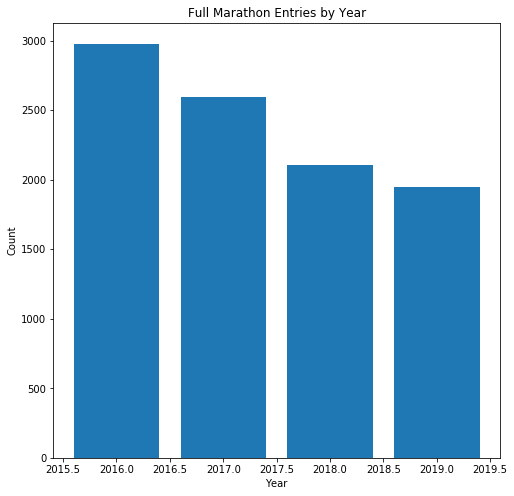

In [47]:
years = ['2016', '2017', '2018', '2019']

fig, all_full_plot = plt.subplots(figsize=(8,8))
all_full_plot.bar(full_marathons_group['Year'], full_marathons_group['Bib'])
plt.xlabel('Year')
plt.ylabel('Count')
##all_full_plot.set_xticklabels(years)
plt.title('Full Marathon Entries by Year', color = 'black');

## Some kind of chart for Half Marathons

In [48]:
half_marathons_group = all_half_marathons.groupby(['Year']).count()

In [49]:
half_marathons_group = half_marathons_group.reset_index()
half_marathons_group = half_marathons_group[['Year', 'Bib']]

half_marathons_group.head()

,Year,Bib
0,2016,17917
1,2017,17699
2,2018,14940
3,2019,13706


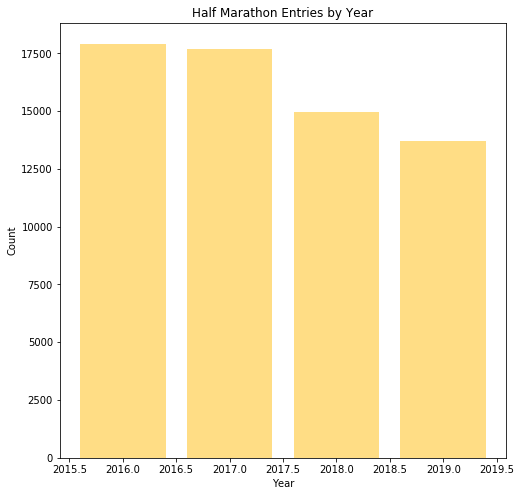

In [57]:
years = ['2016', '2017', '2018', '2019']

fig, all_half_plot = plt.subplots(figsize=(8,8))
all_half_plot.bar(half_marathons_group['Year'], half_marathons_group['Bib'], color = '#ffdd85')
plt.xlabel('Year')
plt.ylabel('Count')
all_full_plot.set_xticklabels(years)
plt.title('Half Marathon Entries by Year', color = 'black')

plt.show()

In [ ]:
## attempting to label tops of bars with count values

for i in range(len(years)): # your number of bars
    plt.text(year = x_values[i]-0.25, #takes your x values as horizontal positioning argument 
    y = y_values[i]+1, #takes your y values as vertical positioning argument 
    s = data_labels[i], # the labels you want to add to the data
    size = 9) # font size of datalabels

In [ ]:
## to change finish times to minutes

factors = (60, 1, 1/60)
full_all['Finish_Time_Min'] = full_all['Time'].apply( lambda x: round(sum(i*j for i, j in zip(map(int, x.split(':')), factors)),2) )
